# Import libraries and data

In [3]:
import pandas as pd
from typing import List
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../data/raw/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t', on_bad_lines='skip',header=None)

In [5]:
df.head()

,0,1,2,3,4,5
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19098853 entries, 0 to 19098852
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       object
 1   1       object
 2   2       object
 3   3       object
 4   4       object
 5   5       object
dtypes: object(6)
memory usage: 874.3+ MB


In [7]:
# rename the columns
df.columns = ['userid', 'timestamp', 'musicbrainz_artist_id', 'artist_name', 'musicbrainz_track_id', 'track_name']

# EDA

In [8]:
def show_stats(df:pd.DataFrame):
    """
    Show stats data
    @param df: dataframe
    """
    # how many unique users are there
    print("Unique users number: %d"%len(df.userid.unique()))
    # how many unique artists are there
    print("Unique artists number: %d"%len(df.artist_name.unique()))
    # how many unique songs are there
    print("Unique track number: %d"%len(df.track_name.unique()))
    # how many unique songs with artist are there
    if('artist_track' in df.columns):
        print("Unique artists_track number: %d"%len(df.artist_track.unique()))

In [9]:
def check_missing_value(df:pd.DataFrame, cols:List[str]) -> pd.DataFrame:
    """
    Count missing values in specified columns.
    @param df: dataframe
    @param cols: columns to be calculated
    return: summary information
    """
    res = pd.DataFrame(cols, columns=['Feature'])
    na_cnts = [sum(df[col].isna()) for col in cols]
    res['NA Count'] = na_cnts
    res['NA Rate'] = res['NA Count'] / df.shape[0]
    res = res[res['NA Count'] != 0]
    res = res.sort_values(by='NA Count', ascending=False).reset_index(drop=True)
    return res

In [10]:
show_stats(df)

Unique users number: 992
Unique artists number: 173921
Unique track number: 1083472


In [11]:
check_missing_value(df, df.columns)

,Feature,NA Count,NA Rate
0,musicbrainz_track_id,2162719,1.132382e-01
1,musicbrainz_artist_id,600848,3.145990e-02
2,track_name,12,6.283100e-07


Lots of id are missing. Track names are barely missing.

In [12]:
df['datetime'] = pd.to_datetime(df['timestamp'])
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day
df['hour'] = df.datetime.dt.hour

In [105]:
df.head()

,userid,timestamp,musicbrainz_artist_id,artist_name,musicbrainz_track_id,track_name,date,datetime,year,month,hour,day
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,2009-05-04 23:08:57+00:00,2009-05-04 23:08:57+00:00,2009,5,23,4
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),2009-05-04 13:54:10+00:00,2009-05-04 13:54:10+00:00,2009,5,13,4
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),2009-05-04 13:52:04+00:00,2009-05-04 13:52:04+00:00,2009,5,13,4
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),2009-05-04 13:42:52+00:00,2009-05-04 13:42:52+00:00,2009,5,13,4
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),2009-05-04 13:42:11+00:00,2009-05-04 13:42:11+00:00,2009,5,13,4


In [13]:
df['artist_name'] = df['artist_name'].astype(str)
df['track_name'] = df['track_name'].astype(str)
df['artist_track'] = df[['artist_name', 'track_name']].agg('_'.join, axis=1)

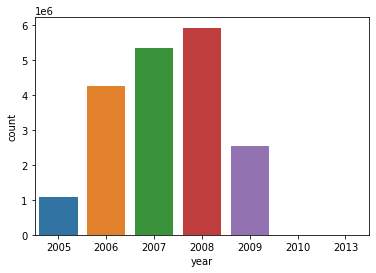

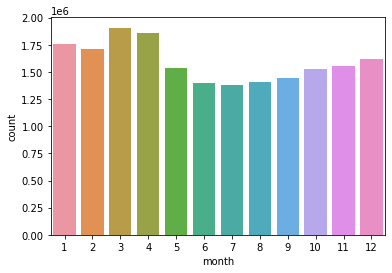

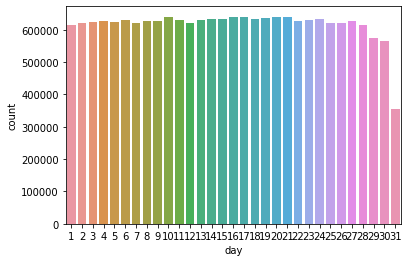

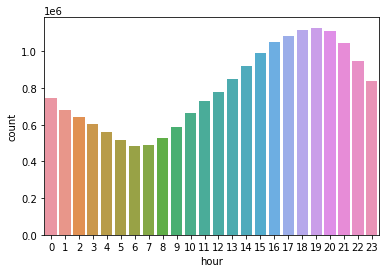

In [106]:
# listening habits in different period of time
plt.figure()
ax1 = sns.countplot(x='year',data=df)
plt.figure()
ax2 = sns.countplot(x='month',data=df)
plt.figure()
ax2 = sns.countplot(x='day',data=df)
plt.figure()
ax3 = sns.countplot(x='hour',data=df)

People tend to listening to music during the night and in spring season. Most the listning records are from 2006 to 2008.

In [121]:
# top 10 popular tracks
df['track_name'].value_counts()[:10]

Intro                 17561
[Untitled]             6926
Untitled               6586
Home                   6304
All I Need             6234
Angel                  6002
Heartbeats             5676
Wake Up                5658
Crazy                  5627
Such Great Heights     5571
Name: track_name, dtype: int64

Note that there are lots of tracks with 'Untitled' and '[Untitled]'. We need to remove these rows.

In [113]:
# top 10 popular tracks
df['artist_track'].value_counts()[:10]

The Postal Service_Such Great Heights    3991
Boy Division_Love Will Tear Us Apart     3651
Radiohead_Karma Police                   3533
Death Cab For Cutie_Soul Meets Body      3479
Muse_Supermassive Black Hole             3463
The Knife_Heartbeats                     3155
Arcade Fire_Rebellion (Lies)             3047
Muse_Starlight                           3040
Britney Spears_Gimme More                3002
The Killers_When You Were Young          2997
Name: artist_track, dtype: int64

In [94]:
# top 10 popular artists
df['artist_name'].value_counts()[:10]

Radiohead              115099
The Beatles            100126
Nine Inch Nails         84317
Muse                    63144
Coldplay                62212
Depeche Mode            59609
Pink Floyd              58484
Death Cab For Cutie     58046
Placebo                 53492
Elliott Smith           50202
Name: artist_name, dtype: int64

# Sampling

Since data is too large, I decided to filter out a one month listening records to move forward.

In [14]:
# we only take one month listening record data
df_sample = df[(df.year==2008) & (df.month==3)]

In [18]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482386 entries, 10470 to 19097502
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   userid                 482386 non-null  object             
 1   timestamp              482386 non-null  object             
 2   musicbrainz_artist_id  467352 non-null  object             
 3   artist_name            482386 non-null  object             
 4   musicbrainz_track_id   426429 non-null  object             
 5   track_name             482386 non-null  object             
 6   datetime               482386 non-null  datetime64[ns, UTC]
 7   year                   482386 non-null  int64              
 8   month                  482386 non-null  int64              
 9   day                    482386 non-null  int64              
 10  hour                   482386 non-null  int64              
 11  artist_track           482386 non

In [19]:
df_sample.head()

,userid,timestamp,musicbrainz_artist_id,artist_name,musicbrainz_track_id,track_name,datetime,year,month,day,hour,artist_track
10470,user_000001,2008-03-31T14:21:08Z,NaN,Woodblue,NaN,Green Flash,2008-03-31 14:21:08+00:00,2008,3,31,14,Woodblue_Green Flash
10471,user_000001,2008-03-31T14:16:53Z,NaN,Woodblue,NaN,Iioa,2008-03-31 14:16:53+00:00,2008,3,31,14,Woodblue_Iioa
10472,user_000001,2008-03-31T14:02:39Z,NaN,Lushlife & The Age Of Imagination Quartet,NaN,No Foundation,2008-03-31 14:02:39+00:00,2008,3,31,14,Lushlife & The Age Of Imagination Quartet_No F...
10473,user_000001,2008-03-31T13:18:56Z,630662ea-1c7d-4208-99fd-ba3afec20f0c,Amon Tobin,3785cd62-4f04-49ee-a2ab-587956152891,Bloodstone,2008-03-31 13:18:56+00:00,2008,3,31,13,Amon Tobin_Bloodstone
10474,user_000001,2008-03-31T13:09:58Z,7c158ea8-c0aa-410e-bdc1-20bba9759577,The Cinematic Orchestra,919b8a05-e1eb-4402-a2a8-7cc40fcede7c,To Build A Home,2008-03-31 13:09:58+00:00,2008,3,31,13,The Cinematic Orchestra_To Build A Home


In [20]:
check_missing_value(df_sample, df_sample.columns)

,Feature,NA Count,NA Rate
0,musicbrainz_track_id,55957,0.116000
1,musicbrainz_artist_id,15034,0.031166


No track names are missing, but still lots of id are missing. I decide to combine the artist_name and track_name to make it unique.

In [78]:
show_stats(df_sample)

Unique users number: 590
Unique artists number: 29197
Unique track number: 148659
Unique artists_track number: 178423


In [17]:
# export the sampled data
df_sample.to_csv('../data/interim/user-lisetning-records-2008-march.csv')